<a href="https://colab.research.google.com/github/mlvlab/AnomalyDetection_tutorial/blob/main/AnomalyDetection_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/mlvlab/AnomalyDetection_tutorial.git

Cloning into 'AnomalyDetection_tutorial'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.


Data link: http://odds.cs.stonybrook.edu/

## 1. Data Load

### X = Multi-dimensional point data
### y = labels (1 = outliers, 0 = inliers)

In [2]:
import scipy.io
import pandas as pd

mat = scipy.io.loadmat('/content/AnomalyDetection_tutorial/thyroid.mat') 
mat = {k:v for k, v in mat.items() if k[0] != '_'}

print(mat.keys())
print("All dataset: {}".format(len(mat['y'])))

dict_keys(['X', 'y'])
All dataset: 3772


In [3]:
mat['X']

array([[7.74193548e-01, 1.13207547e-03, 1.37571157e-01, 2.75700935e-01,
        2.95774648e-01, 2.36065574e-01],
       [2.47311828e-01, 4.71698113e-04, 2.79886148e-01, 3.29439252e-01,
        5.35211268e-01, 1.73770492e-01],
       [4.94623656e-01, 3.58490566e-03, 2.22960152e-01, 2.33644860e-01,
        5.25821596e-01, 1.24590164e-01],
       ...,
       [9.35483871e-01, 2.45283019e-02, 1.60341556e-01, 2.82710280e-01,
        3.75586854e-01, 2.00000000e-01],
       [6.77419355e-01, 1.47169811e-03, 1.90702087e-01, 2.42990654e-01,
        3.23943662e-01, 1.95081967e-01],
       [4.83870968e-01, 3.56603774e-03, 1.90702087e-01, 2.12616822e-01,
        3.38028169e-01, 1.63934426e-01]])

In [4]:
mat['y']

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

## 1-1 Transform Data type: Dictionary to DataFrame

- Dictionary 형태에서 normal, outlier에 해당하는 index를 저장
- X, y를 normal, outlier로 index로 구분지어 DataFrame 형의 변수에 저장

In [5]:
# Dictionary에서 normal, outlier에 해당하는 index를 찾아서 따로 저장
normal_data_index = [i for i in range(len(mat['y'])) if mat['y'][i] == 0]
outlier_data_index = [i for i in range(len(mat['y'])) if mat['y'][i] == 1]

In [6]:
print("normal data: {}".format(len(normal_data_index)))
print("outlier data: {}".format(len(outlier_data_index)))

# normal index, outlier index 출력
print(normal_data_index[:20])
print(outlier_data_index[:20])

normal data: 3679
outlier data: 93
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20]
[19, 27, 105, 115, 116, 147, 208, 289, 387, 406, 429, 517, 519, 544, 568, 600, 639, 686, 794, 838]


In [7]:
# X (data), y (label)을 먼저 DataFrame으로 저장
dataframe_X = pd.DataFrame(mat['X'])
dataframe_y = pd.DataFrame(mat['y'])

In [8]:
# DataFrame 형태 확인
dataframe_X.head()

,0,1,2,3,4,5
0,0.774194,0.001132,0.137571,0.275701,0.295775,0.236066
1,0.247312,0.000472,0.279886,0.329439,0.535211,0.173770
2,0.494624,0.003585,0.222960,0.233645,0.525822,0.124590
3,0.677419,0.001698,0.156546,0.175234,0.333333,0.136066
4,0.236559,0.000472,0.241935,0.320093,0.333333,0.247541


In [9]:
# DataFrame 형태 확인
dataframe_y.head()

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [10]:
# DataFrame에서 normal, outlier index의 행을 추출해서 분리
normal_data_X = dataframe_X.iloc[normal_data_index]
normal_data_y = dataframe_y.iloc[normal_data_index]

fraud_data_X = dataframe_X.iloc[outlier_data_index]
fraud_data_y = dataframe_y.iloc[outlier_data_index]

In [11]:
normal_data_y

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
3767,0.0
3768,0.0
3769,0.0
3770,0.0


In [12]:
fraud_data_y

,0
19,1.0
27,1.0
105,1.0
115,1.0
116,1.0
...,...
3562,1.0
3565,1.0
3589,1.0
3625,1.0


In [13]:
print("Length of dataframe_X: {}".format(len(dataframe_X)))
print("Length of dataframe_y: {}".format(len(dataframe_y)))

print("Length of normal_data_X: {}".format(len(normal_data_X)))
print("Length of normal_data_y: {}".format(len(normal_data_y)))

print("Length of normal_data_X: {}".format(len(fraud_data_X)))
print("Length of normal_data_X: {}".format(len(fraud_data_y)))

Length of dataframe_X: 3772
Length of dataframe_y: 3772
Length of normal_data_X: 3679
Length of normal_data_y: 3679
Length of normal_data_X: 93
Length of normal_data_X: 93


## 1-2 Split Dataset into Trainset and Testset

- 학습에는 Normal data만 사용
- train_test_split의 인자: Normal dataset의 data, label 
- 테스트 시에는 Normal, Outlier 데이터를 모두 사용

In [14]:
from sklearn.model_selection import train_test_split

# Split train and test
X_train, X_test, y_train, y_test = train_test_split(normal_data_X,normal_data_y,test_size=0.1,random_state=34)

print("Length of X_train: {}".format(len(X_train)))
print("Length of y_train: {}".format(len(y_train)))

print("Length of X_test: {}".format(len(X_test)))
print("Length of y_test: {}".format(len(y_test)))

Length of X_train: 3311
Length of y_train: 3311
Length of X_test: 368
Length of y_test: 368


In [15]:
# 테스트 시에는 Normal, Outlier 데이터를 모두 사용하므로 앞에서 만든 X_test, y_test에 outlier 데이터 추가
X_test = (X_test.append(fraud_data_X,sort=False)).sort_index()
y_test = (y_test.append(fraud_data_y,sort=False)).sort_index()

print("Length of X_test: {}".format(len(X_test)))
print("Length of y_test: {}".format(len(y_test)))

Length of X_test: 461
Length of y_test: 461


### Visualization 함수 선언
- outlier가 outlier인지를 잘 판단해야함
- roc_curve를 그릴때 판단 기준은 Outlier label (=1)
- pos_label=1

In [16]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Function for visualization
def roc_auc(labels, scores, defect_name = None, save_path = None):
        fpr, tpr, _ = roc_curve(labels, scores, pos_label=1) # outlier label: 1
        roc_auc = auc(fpr, tpr)

        plt.title(f'ROC curve: {defect_name}')
        plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
        plt.legend(loc='lower right')
        plt.plot([0, 1], [0, 1], 'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')

        plt.show()
        return roc_auc

# 2 모델 학습 & 시각화

- Gaussian Mixture Model (GMM)
- Kernel Density Estimation (KDE)
- Local Outlier Factor (LOF)
- Isolation Forest (iForest)


In [17]:
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KernelDensity, LocalOutlierFactor
from sklearn.ensemble import IsolationForest

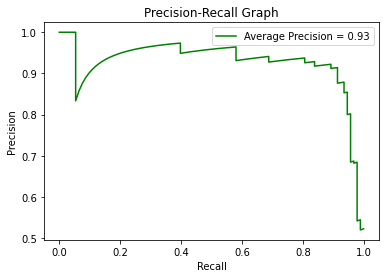

average_precision: 92.69170595484493


In [18]:
# GMM 선언 및 학습
num_mixture = 100
GMM = GaussianMixture(n_components=num_mixture, random_state=42, covariance_type='diag')

GMM.fit(X_train)
y_test_score = -GMM.score_samples(X_test)

# Precision and recall curve
precision, recall, _ = precision_recall_curve(y_test, y_test_score, pos_label=1)

# Calculate average precision
average_precision = average_precision_score(y_test, y_test_score, pos_label=1, average = 'samples')

# For Visualization
plt.title("Precision-Recall Graph")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.plot(recall, precision, "g", label = "Average Precision = %0.2F" % average_precision)
plt.legend(loc = "upper right")
plt.show()

print('average_precision:' , format(average_precision*100))

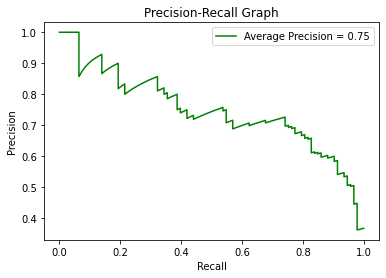

average_precision: 74.8533406764615


In [19]:
# KDE 선언 및 학습
band_width = 0.1
KDE = KernelDensity(kernel='gaussian', bandwidth=band_width)

KDE.fit(X_train)
y_test_score = -KDE.score_samples(X_test)

# Precision and recall curve
precision, recall, _ = precision_recall_curve(y_test, y_test_score, pos_label=1)

# Calculate average precision
average_precision = average_precision_score(y_test, y_test_score, pos_label=1, average = 'samples')

# For Visualization
plt.title("Precision-Recall Graph")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.plot(recall, precision, "g", label = "Average Precision = %0.2F" % average_precision)
plt.legend(loc = "upper right")
plt.show()

print('average_precision:' , format(average_precision*100))

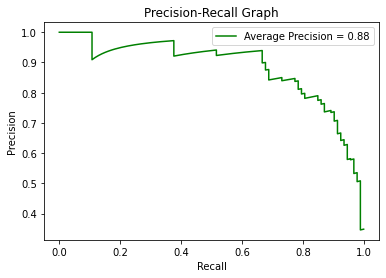

average_precision: 88.3078558132218


In [20]:
# LOF 선언 및 학습
n_neighbors = 10
LOF = LocalOutlierFactor(n_neighbors=n_neighbors, contamination="auto", novelty=True)

LOF.fit(X_train)
y_test_score = -LOF.score_samples(X_test)

# Precision and recall curve
precision, recall, _ = precision_recall_curve(y_test, y_test_score, pos_label=1)

# Calculate average precision
average_precision = average_precision_score(y_test, y_test_score, pos_label=1, average = 'samples')

# For Visualization
plt.title("Precision-Recall Graph")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.plot(recall, precision, "g", label = "Average Precision = %0.2F" % average_precision)
plt.legend(loc = "upper right")
plt.show()

print('average_precision:' , format(average_precision*100))

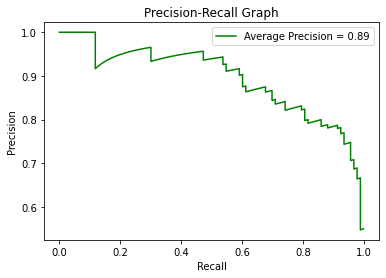

average_precision: 89.42517065027815


In [21]:
# iForest 선언
max_samples = 100
IForest = IsolationForest(max_samples=max_samples, contamination = 'auto', random_state=0)

IForest.fit(X_train)
y_test_score = -IForest.score_samples(X_test)

# Precision and recall curve
precision, recall, _ = precision_recall_curve(y_test, y_test_score, pos_label=1)

# Calculate average precision
average_precision = average_precision_score(y_test, y_test_score, pos_label=1, average = 'samples')

# For Visualization
plt.title("Precision-Recall Graph")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.plot(recall, precision, "g", label = "Average Precision = %0.2F" % average_precision)
plt.legend(loc = "upper right")
plt.show()

print('average_precision:' , format(average_precision*100))